# Part 1

The following code represents a simple, inefficient pattern search that might be found during EDA in a jupyter notebook.

In a separate `.py` file, refactor this code using OOP to make it more extensible and efficient.

Your object should be able to do each of the following:

1. Accept either a string or a list of words as input text to be searched for pattern matches (if a string is passed, only words in the string that match the pattern should be caught)
2. Allow for registering an arbitrary number of pattern groups to search input text
3. Allow the user to specify a specific pattern group to search the text for matches
4. Allow the user to search input text with all registered patterns and return all matches by pattern group

In [96]:
import pandas as pd
import time
import requests
import matplotlib.pyplot as plt

In [15]:
site = 'https://www.gutenberg.org/files/11/11-0.txt'
response = requests.get(site)
# e = response.text.encode().decode()
# print(e)
words = response.text.replace('\n', '')
words = words.replace('\r', ' ').split(' ')
test = words


### Naive Implementation

In [46]:
#my_words = ['dog', 'cat', 'mouse', 'bird', 'snake', 'kitten', 'puppy', 'rat', 'cat']
my_words = test

pattern_1_words = []
pattern_2_words = []

pattern_group_1 = [
    'plas',
    'dry'
]

pattern_group_2 = [
    'in',
    'mo'
]

start = time.time()
for word in my_words:
    for pat in pattern_group_1:
        if pat in word:
            pattern_1_words.append(word)
print(time.time() - start)

start = time.time()
for word in my_words:
    for pat in pattern_group_2:
        if pat in word:
            pattern_2_words.append(word)
print(time.time() - start)

print(f"Pattern 1: {pattern_1_words}")
#print(f"Pattern 2: {pattern_2_words}")

0.00737309455871582
0.006721973419189453
Pattern 1: ['dry', 'splash!', 'splashing', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'splashing', 'dry,', 'splashed']


In [6]:
import time, requests, sys

class Index:
	def __init__(self):
		self.words = []
		self.index = {}

	def add_word(self, word):
		loc = len(self.words)
		self.words.append(word)

		for i in range(len(word)):
			for j in range(1, len(word) - i + 1):
				k = word[i:i+j]
				if k in self.index:
					self.index[k].append(loc)
				else:
					self.index[k] = [loc]

	def search(self, word):
		matches = [self.words[i] for i in self.index.get(word, [])]

		return matches


# util funcs

def get_words(large):
	if large:
		word_site = "https://www.mit.edu/~ecprice/wordlist.100000"
	else:
		word_site = "https://www.mit.edu/~ecprice/wordlist.10000"

	response = requests.get(word_site)
	words = response.content.splitlines()

	return [i.decode() for i in words]

def get_alice_words():
	word_site = 'https://www.gutenberg.org/files/11/11-0.txt'
	response = requests.get(word_site)

	words = response.text.replace('\n', '').split(' ')

	return words


def sizeof(obj):
    size = sys.getsizeof(obj)
    if isinstance(obj, dict): return size + sum(map(sizeof, obj.keys())) + sum(map(sizeof, obj.values()))
    if isinstance(obj, (list, tuple, set, frozenset)): return size + sum(map(sizeof, obj))
    return size

def trinum(n):
	return (n * (n + 1)) / 2


# benchmark an index vs string.find

def benchmark(index, words, word, n=100):
	length = 0

	time_a = time.time()
	for _ in range(n):
		length = len(index.search(word))
	time_a = (time.time() - time_a) / n

	time_b = time.time()
	for _ in range(n):
		length2 = len([i for i in words if i.find(word) != -1])
		if length2 != length:
			raise Exception("mismatching lengths: {} and {}".format(length, length2))
	time_b = (time.time() - time_b) / n

	return time_b / time_a


# run main

if __name__ == '__main__':
	words = get_words(False)
	#words = get_alice_words()

	start = time.time()
	index = Index()
	for i in words:
		index.add_word(i)
	
	print("indexing took {} with size of {}".format(time.time() - start, sizeof(index.index)))

	for test in ["so", "man", "sopololous", "tat", "tug"]:
		comparison = benchmark(index, words, test)
		print("{} performed by a factor of {}".format(test, comparison))

indexing took 0.1345658302307129 with size of 20320410
so performed by a factor of 67.44441696550018
man performed by a factor of 329.664570230608
sopololous performed by a factor of 2021.0297872340425
tat performed by a factor of 295.326352530541
tug performed by a factor of 1838.4420289855075


### Pattern_Match Class
- Will be written to .py file and imported
- Was considering Rabin-Karp or Boyer-Moore-Horsepool
- Decided against above due to search object being list of strings
- Implementation is an index of each match in list
- Requires a reference list 


In [80]:
class PatternMatch():
    def __init__(self, body = []):
        self.table = {} # Make own hash table, with all functionality
        self.body = []
        
        self.add_to_table(body)
        

    def add_to_table(self, words):
        for word in words:
            n_pos = len(self.body)
            self.body.append(word)

            for k in range(len(word) + 1):

                for j in range(k):
                    val = word[j:len(word) - (k - 1) + j]
                    if val in self.table:
                        self.table[val].add(n_pos)
                    else:
                        self.table[val] = {n_pos}
                    
                    
    def search_indexes(self, pattern):
        out = []
        for seq in pattern:
            if seq in self.table:
                out.append(self.table[seq])
            else:
                pass
            
        return out
    
    
    def search(self, pattern):
        indexes = [list(i) for i in self.search_indexes(pattern)]
        out = []
        for i in indexes:
            out.append([self.body[j] for j in i])
            
        return out
    
    
    def reindex(self, body = []):
        if body == []:
            body = self.body
        self.body = []
        self.table = {}
        self.add_to_table(body)
        
        
    def delete(self, values):
        vals = [i for i in self.body if i not in values]
        self.reindex(vals)


In [82]:
start = time.time()
CP = PatternMatch(test)
print('index time', time.time() - start)

start = time.time()
one = CP.search(['rt', 'dry'])
print('search time 1', time.time() - start)
start = time.time()
two = CP.search(['in', 'mo'])
print('search time 2', time.time() - start)

index time 0.3404390811920166
search time 1 0.0001690387725830078
search time 2 0.00041413307189941406


# Part 2

Writes tests for your code using `pytest`

In [102]:
site = 'https://www.gutenberg.org/files/11/11-0.txt'
response = requests.get(site)
# e = response.text.encode().decode()
# print(e)
words = response.text.replace('\n', '')
words = words.replace('\r', ' ').split(' ')
test = words

# Part 3

Imagine your job is to help build the text processing pipeline for a machine learning model. This model takes strings, processes them into vectors, and then classifies the text as relating to one of several categories (a multiclass classifier).

The raw data that is passed into the machine learning pipeline has strings that may include descriptions of many items, including multiple items that we are seeking to classify, as well as descriptions of items that are irrelevant to our classifier. These must be separated before being passed to classifier.

As the newest member of the team, your job is to get up to speed with the data as quickly as possible, and to find opportunities to improve the text processing pipeline. Perform an EDA on the following CSV to accomplish this. Be prepared to explain what insights you learned from the data, and what approaches you might use to improve the pipeline.

Perform the analysis in this notebook, below this prompt.

In [101]:
import utils
import index

In [110]:
ind = index.Indexer(words)
search_terms = list(ind.table.keys())

def diff_patterns(pat_1, pat_2):
    for i in pat_1:
        if i in pat_2:
            pat_2.pop(pat_2.index(i))

    return pat_2

In [152]:
# do a * b and c * d
# or do a * b, a * c, a * d, b * c, b * d, c * d
# if the latter isn't too slow, do that
def search_all_indexes(words=words):
    counter = 0
    start = time.time()
    time_i = 0
    time_b = 0
    time_f = 0
    time_r = 0
    ind = index.Indexer(words)
    search_terms = list(ind.table.keys())
    mismatches = {}
    for i in search_terms:
        counter += 1

        # search ind
        tsi = time.time()
        i_vals = ind.search([i])[0]
        time_i += time.time() - tsi
    
        # search words with base
        bsi = time.time()
        _, b_vals = utils.base_searcher(words, [i])
        time_b += time.time() - bsi
        
        # search words with .find
        fsi = time.time()
        _, f_vals = utils.find_searcher(words, [i])
        time_f += time.time() - fsi
        
        # search words with regex
        rsi = time.time()
        _, r_vals = utils.find_searcher(words, [i])
        time_r += time.time() - fsi
        
        
        # compare ind to regex
        a = i_vals.copy()
        b = r_vals.copy()
        dif_ind_reg = diff_patterns(a, b)
        
        # compare ind to base
        a = i_vals.copy()
        b = b_vals.copy()
        dif_ind_bas = diff_patterns(a, b)
        
        # compare ind to .find
        a = i_vals.copy()
        b = f_vals.copy()
        dif_ind_fin = diff_patterns(a, b)

        term_score = len(dif_ind_reg) + len(dif_ind_bas) + len(dif_ind_fin)
        
        mismatches[i] = term_score
        
        if counter % 10000 == 0:
            print('iteration {} of {} done'.format(counter, len(search_terms)))
            print('index time', time_i / 60)
            print('base time', time_b / 60)
            print('find time', time_f / 60)
            print('regex time', time_r / 60)
        
    print('finished in {} seconds'.format((time.time() - start / 60)))
    errors = 0
    for i in mismatches:
        errors += mismatches[i]
    print('{} match discrepancies'.format(errors))
    print('index time', time_i / 60)
    print('base time', time_b / 60)
    print('find time', time_f / 60)
    print('regex time', time_r / 60)
    return mismatches
    
    
    
    # step one is index and then grab all keys
    # step two is to search through all indexes based on the three methods
    # then test comparisons one by one until all the same
    # then combine into one step
    

test = search_all_indexes()

# regex and find take 4 and 9 minutes on small dataset, will omit for speed
# for next trials

iteration 10000 of 60478 done
index time 0.0016473134358723958
base time 0.2958773136138916
find time 0.8217598994572958
regex time 1.6415414690971375
iteration 20000 of 60478 done
index time 0.0023713986078898112
base time 0.5822011232376099
find time 1.6270170609156291
regex time 3.251758074760437
iteration 30000 of 60478 done
index time 0.0030285875002543134
base time 0.8603448987007141
find time 2.4220074812571206
regex time 4.8410702586174015
iteration 40000 of 60478 done
index time 0.0037088314692179363
base time 1.1418578545252482
find time 3.223866033554077
regex time 6.443383506933848
iteration 50000 of 60478 done
index time 0.004407227039337158
base time 1.4176149249076844
find time 4.020919823646546
regex time 8.036771913369497
iteration 60000 of 60478 done
index time 0.005066041151682536
base time 1.6980190714200338
find time 4.819965008894602
regex time 9.635029872258505
finished in 1606275761.3329885 seconds
0 match discrepancies
index time 0.005100150903065999
base time 

In [154]:
mismatches

NameError: name 'mismatches' is not defined

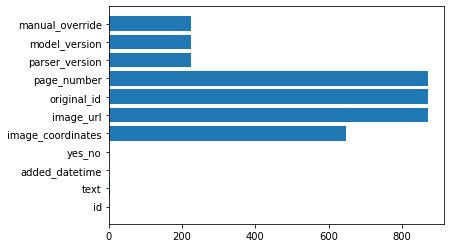

In [98]:
df = pd.read_csv('takehome.csv')

# Making an assumption that the 'no's' are the no's
df_yes = df.loc[df['yes_no'] == 'yes']


nans = [df_yes[i].isna().sum() for i in df_yes.columns]

fig, ax = plt.subplots()

x = df_yes.columns
y = nans

ax.barh(x, y)

plt.show()